In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#ignore warning messages 
import warnings
warnings.filterwarnings('ignore') 

# set seaborn
sns.set()

In [28]:
df = pd.read_csv('Iris.csv')


In [29]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [30]:
dataset = df.drop(['Species','Id'],axis = 1)
dataset.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [31]:
from sklearn.preprocessing import StandardScaler

standard = StandardScaler()
Base = pd.DataFrame(standard.fit_transform(dataset))
Base.head()

,0,1,2,3
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977


In [32]:
from minisom import MiniSom    
from matplotlib.gridspec import GridSpec

som = MiniSom(7, 7, 4, sigma=0.25,neighborhood_function='gaussian') 
som.train_random(Base.to_numpy(), 3000) #Geração do Modelo

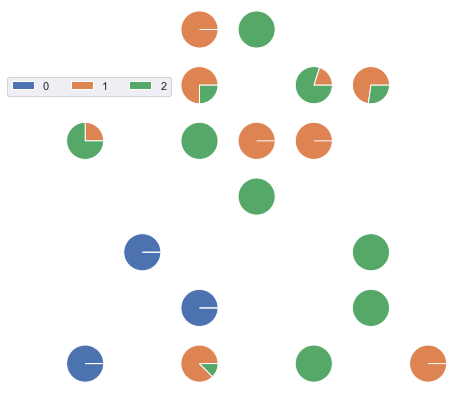

In [33]:
alvo = df.Species.astype('category').cat.codes #Transformar para números
maps = som.labels_map(Base.to_numpy(), alvo)
nomes = np.unique(alvo)

plt.figure(figsize=(7, 7))
the_grid = GridSpec(7, 7)


#Geração do gráfico
for position in maps.keys():
    label_fracs = [maps[position][l] for l in nomes]
    plt.subplot(the_grid[6-position[1], position[0]], aspect=1)
    patches, texts = plt.pie(label_fracs)
plt.legend(patches, nomes, bbox_to_anchor=(0, 2), ncol=3)

plt.show()